In [1]:
import xmltodict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def xrdml2csv(xrdml_file, csv_file):
    with open(xrdml_file) as f:
        xrdml = xmltodict.parse(f.read())
    axis_dict = xrdml['xrdMeasurements']['xrdMeasurement']['scan']['dataPoints']['positions'][0]
    assert axis_dict['@axis'] == '2Theta', 'Only 2Theta axis is supported'
    startPos = float(axis_dict['startPosition'])
    endPos = float(axis_dict['endPosition'])

    data = xrdml['xrdMeasurements']['xrdMeasurement']['scan']['dataPoints']['intensities']['#text']
    intensities = np.array(data.split(), dtype=float)
    two_theta = np.linspace(startPos, endPos, len(intensities))

    df = pd.DataFrame({'2Theta': two_theta, 'Intensity': intensities})
    df.to_csv(csv_file, index=False)
    return df

In [3]:
xrdml2csv('/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/240828-FeF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.xrdml','/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/240828-FeF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv')

,2Theta,Intensity
0,20.008356,6782.0
1,20.025067,6760.0
2,20.041778,6688.0
3,20.058489,6633.0
4,20.075201,6662.0
...,...,...
2987,69.924916,3365.0
2988,69.941627,3547.0
2989,69.958339,3482.0
2990,69.975050,3449.0


Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/240828-FeF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv:
      2Theta  Intensity
0  20.008356     6782.0
1  20.025067     6760.0
2  20.041778     6688.0
3  20.058489     6633.0
4  20.075201     6662.0
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/240828-FeF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv:
      2Theta  Intensity
0  20.008356     6815.0
1  20.025067     6560.0
2  20.041778     6678.0
3  20.058489     6666.0
4  20.075201     6582.0
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/Graphite_reference_final.csv:
   2Theta  Intensity
0   26.61     1000.0
1   26.68      500.0
2   43.45      139.6
3   43.57       69.8
4   46.32       91.0


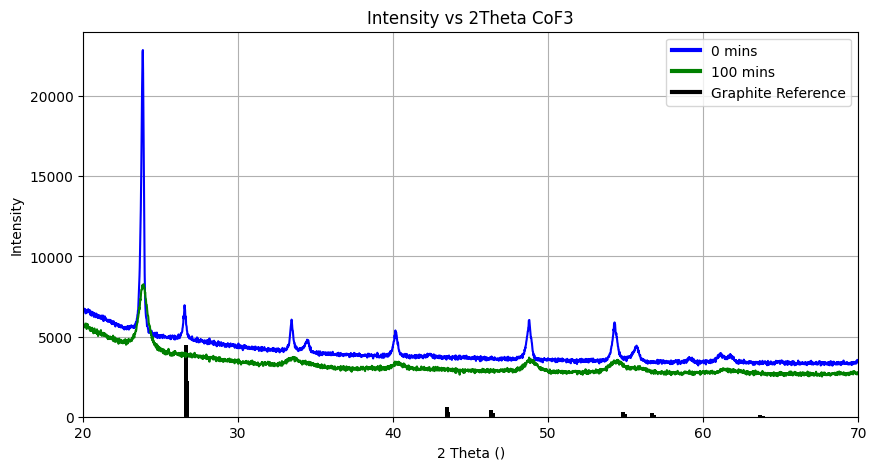

In [ ]:
from matplotlib.lines import Line2D

# List of CSV files
zero_min_data = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/240828-FeF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'
hundred_min_data = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/240828-FeF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv'
graphite = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/Graphite_reference_final.csv'

csv_files = [zero_min_data,hundred_min_data,graphite]

colors = ['b', 'g','black']  # Colors for each CSV
legendlabels = ['0 mins','100 mins','Graphite Reference']

plt.figure(figsize=(10, 5))

# Loop through each CSV and plot
for i, csv_file in enumerate(csv_files):
    
    data = pd.read_csv(csv_file)
    print(f'Data from {csv_file}:')
    print(data.head())
    
    x_column = '2Theta'  # Change to your x-axis column name
    y_column = 'Intensity'  # Change to your y-axis column name
    
    # if csv_file in {'/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/CoF3_reference.csv',
    #                 '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/CoF2_reference.csv',
    #                 '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/Graphite_reference_final.csv'}:
    #     plt.bar(data['2Theta'], 4.5*data['Intensity'], width = 0.25,color=colors[i % len(colors)], label = legendlabels[i])
    # elif csv_file in {'/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/differences_100mins.csv',
    #                   '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/CoF3_1to1_KS6Lgraphite/RR_ASC_0mins_CoF3/Differences_240827-CoF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'}:
    #     plt.plot(data['2Theta'], 5000+data['Intensity'], marker='o', markersize=.01, linestyle='-', color=colors[i % len(colors)], label = legendlabels[i])
    # elif csv_file in {'/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/240827-CoF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv','/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/CoF3_1to1_KS6Lgraphite/RR_ASC_0mins_CoF3/Calculated_Profile_240827-CoF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'}:
    #     plt.plot(data['2Theta'], 200+data['Intensity'], marker='o', markersize=.01, linestyle='-', color=colors[i % len(colors)], label = legendlabels[i])
    
    if csv_file == zero_min_data:
        plt.plot(data['2Theta'], data['Intensity'], marker='o', markersize=.01, linestyle='-', color=colors[i % len(colors)], label = legendlabels[i])
    if csv_file == hundred_min_data:
        plt.plot(data['2Theta'], data['Intensity']-1000, marker='o', markersize=.01, linestyle='-', color=colors[i % len(colors)], label = legendlabels[i])
    if csv_file == graphite:
        plt.bar(data['2Theta'], 4.5*data['Intensity'], width = 0.25,color=colors[i % len(colors)], label = legendlabels[i])


custom_handles = [Line2D([0], [0], color=color, lw=3) for color in colors]  # Creates custom handles for legend


plt.xlabel('2 Theta ()')
plt.ylabel(y_column)
plt.title(f'{y_column} vs {x_column} FeF3')
plt.xlim(20,70)
plt.legend(handles=custom_handles, labels=legendlabels)
plt.grid()
plt.show()